In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# pd.set_option('display.max_rows',None)

In [2]:
raw_df=pd.read_csv("datasets//bengaluru_house_prices.csv")

In [3]:
raw_df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


DataCleaning

In [4]:
raw_df.shape

(13320, 9)

In [5]:
# raw_df.groupby('area_type')['area_type'].agg('count')                        

In [6]:
raw_df.groupby('area_type',group_keys=True).apply(lambda x:len(x))

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
dtype: int64

In [7]:
# raw_df.groupby('location').apply(lambda x:x)

In [8]:
raw_df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [9]:
l=['society','area_type','availability']

In [10]:
# raw_df.drop(l,axis='columns',inplace=True)
# raw_df

In [11]:
df=raw_df.drop(l,axis='columns')

In [12]:
df

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [13]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(12710, 6)

In [16]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [17]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [18]:
df['size']=df['size'].apply(lambda x:int(x.split()[0]))

In [19]:
df.head(3)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Uttarahalli,3,1440,2.0,3.0,62.00


In [20]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  7.,  6.,  9., 27., 11., 12., 10.,
       40., 15., 13.])

In [21]:
def is_float(n):
    try:float(n)
    except:return False
    return True

In [22]:
# is_float(5)

In [23]:
df[df['total_sqft'].apply(is_float)==False].head(10)

,location,size,total_sqft,bath,balcony,price
30,Yelahanka,4,2100 - 2850,4.0,0.0,186.000
122,Hebbal,4,3067 - 8156,4.0,0.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,0.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,0.0,43.490
188,KR Puram,2,1015 - 1540,2.0,0.0,56.800
410,Kengeri,1,34.46Sq. Meter,1.0,0.0,18.500
549,Hennur Road,2,1195 - 1440,2.0,0.0,63.770
661,Yelahanka,2,1120 - 1145,2.0,0.0,48.130
672,Bettahalsoor,4,3090 - 5002,4.0,0.0,445.000
772,Banashankari Stage VI,2,1160 - 1195,2.0,0.0,59.935


In [24]:
def convert_range_to_num(a):
    tokens=a.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))//2
    try:
        return float(a)
    except:
        return None

In [25]:
# convert_range_to_num('100-100')

In [26]:
df.total_sqft=df['total_sqft'].apply(convert_range_to_num)

In [27]:
df.dropna(inplace=True)

In [28]:
df[df['total_sqft'].apply(is_float)==False].head(10)


,location,size,total_sqft,bath,balcony,price


Feature Engineering

In [29]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']

In [30]:
df.head()

,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000


In [31]:
len(df.location.unique())

1259

In [32]:
df.location=df.location.apply(lambda x:x.strip())

In [33]:
location_stats=df.groupby('location',group_keys=True).apply(lambda x:len(x)).sort_values(ascending=False)

In [34]:
location_stats

location
Whitefield              514
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          259
Thanisandra             233
                       ... 
1 Giri Nagar              1
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
whitefiled                1
Length: 1248, dtype: int64

In [35]:
len(location_stats[location_stats<=10])

1013

In [36]:
location_stats_lessthan10=location_stats[location_stats<=10]

In [37]:
df.location=df.location.apply(lambda x:'other' if x in location_stats_lessthan10 else x)

In [38]:
len(df.location.unique())

236

RemovalOfOutliers

Techniques we can use

standard deviation 
domain knowledge

In [39]:
len(df)
df.isna().sum()

location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
price_per_sqft    0
dtype: int64

In [40]:
df[(df.total_sqft/df.size)<300].head()

,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000


In [41]:
len(df[df.total_sqft/df.size<300])

12668

In [42]:
len(df[df.total_sqft/df.size>300])


0

In [43]:
df.shape

(12668, 7)

In [44]:
buffer_df=df.copy()

In [45]:
buffer_df=buffer_df[~(buffer_df.total_sqft/buffer_df.size>300)]

In [46]:
buffer_df.shape

(12668, 7)

OUTLIER REMOVAL USING STANDARD DEVIATION AND MEAN

In [47]:
df

,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3,1715.0,3.0,3.0,112.00,6530.612245
13315,Whitefield,5,3453.0,4.0,0.0,231.00,6689.834926
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,1.0,60.00,5258.545136
13318,Padmanabhanagar,4,4689.0,4.0,1.0,488.00,10407.336319


In [48]:
df.price_per_sqft.describe()

count    1.266800e+04
mean     6.876288e+03
std      2.263354e+04
min      2.678298e+02
25%      4.242721e+03
50%      5.376344e+03
75%      7.142857e+03
max      2.300000e+06
Name: price_per_sqft, dtype: float64

Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation



Outliers

In [49]:
# def apply_outlier_method(col):
# least,highest=remove_outlier(df['location'])
# df['location']=np.where(df['location']>highest,highest,df['location'])
# df['location']=np.where(df['location']<least,least,df['location'])


# def remove_outlier(col):
#     sorted(col)
#     q1=col.quantile(0.25)
#     q3=col.quantile(0.75)
#     iqr=q3-q1
#     lowerRange=q1-(1.5*iqr)
#     higherRange=q3+(1.5*iqr)
#     return lowerRange,higherRange

In [50]:
buffer_df=df.copy()

In [51]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


buffer_df = remove_pps_outliers(buffer_df)
buffer_df.shape

(10826, 7)

In [52]:
df=buffer_df.copy()
df.shape

(10826, 7)

NOW WE ARE CHECKING FOR THE APARTMENTS OF 2BHK AND 3BHK WITH ALMOST SAME SQUARE FT AND BELONG TO SAME AREA->BUT HAVEPRICE OF 2BHK MORE THA N PRICE OF 3BHK 

WE DONOT KNOW THE REASON OF THIS.

In [53]:
df.isna().sum()

location          0
size              0
total_sqft        0
bath              0
balcony           0
price             0
price_per_sqft    0
dtype: int64

In [54]:
df

,location,size,total_sqft,bath,balcony,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,1.0,428.00,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,2.0,194.00,11901.840491
2,1st Block Jayanagar,6,1200.0,6.0,2.0,125.00,10416.666667
3,1st Block Jayanagar,3,1875.0,2.0,3.0,235.00,12533.333333
4,1st Block Jayanagar,7,930.0,4.0,2.0,85.00,9139.784946
...,...,...,...,...,...,...,...
10821,other,2,1256.0,2.0,1.0,65.00,5175.159236
10822,other,2,1353.0,2.0,2.0,110.00,8130.081301
10823,other,1,812.0,1.0,0.0,26.00,3201.970443
10824,other,3,1440.0,2.0,2.0,63.93,4439.583333


In [55]:
df.rename(columns={'size':'bhk'},inplace=True)
df

,location,bhk,total_sqft,bath,balcony,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,1.0,428.00,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,2.0,194.00,11901.840491
2,1st Block Jayanagar,6,1200.0,6.0,2.0,125.00,10416.666667
3,1st Block Jayanagar,3,1875.0,2.0,3.0,235.00,12533.333333
4,1st Block Jayanagar,7,930.0,4.0,2.0,85.00,9139.784946
...,...,...,...,...,...,...,...
10821,other,2,1256.0,2.0,1.0,65.00,5175.159236
10822,other,2,1353.0,2.0,2.0,110.00,8130.081301
10823,other,1,812.0,1.0,0.0,26.00,3201.970443
10824,other,3,1440.0,2.0,2.0,63.93,4439.583333


In [56]:
def plot_scatter_plot(df,loc):
#     print(df,loc)
#     print(df.size)
    bhk2=df[(df.location==loc) & (df.bhk==2)]
    bhk3=df[(df.location==loc) & (df.bhk==3)]
#     print(bhk2,bhk3)
#     plt.figure(figsize=(1,1))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='green',marker='*',label='2 BHK')
    plt.scatter(bhk3.total_sqft,bhk3.price,color='red',marker='+',label='3 BHK')
    plt.xlabel("total_sqft")
    plt.ylabel("price")
    plt.title(loc)
    plt.legend()

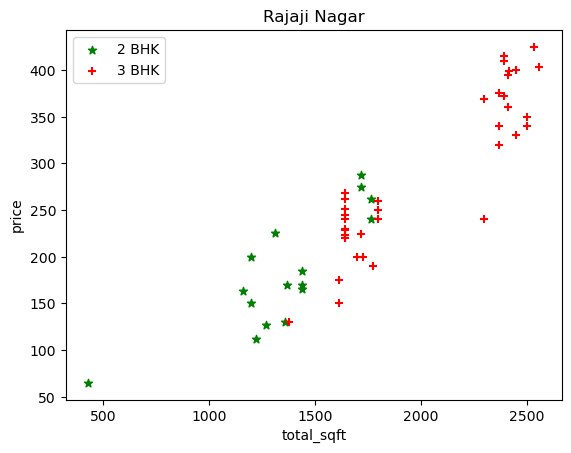

In [57]:
plot_scatter_plot(df,"Rajaji Nagar")

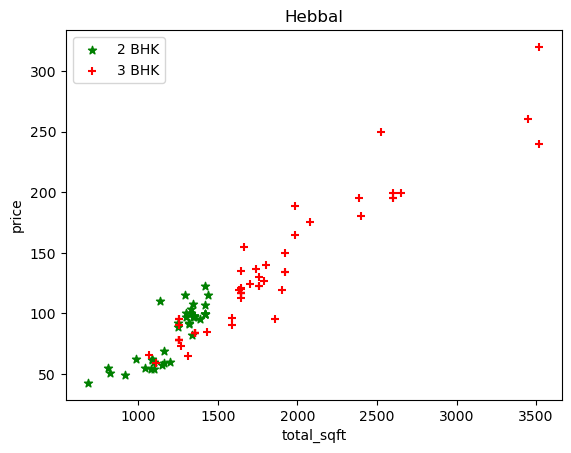

In [58]:
plot_scatter_plot(df,"Hebbal")

WE CAN SEE THAT IN MANY CASES FOR THE SAME TOTAL_SQFT GREEN DOTS ARE AT HIGHER PRICE THATN RED DOTS WHICH MEANS 2BHK'S WERE COSTLIER THAT 3BHK'S FOR SAME SQFT WE HAVE TO REMOVE SUCH DATA INCONSITENCY WHICH WILL.MAY TROUBLE OUR MODEL WHIE TRAINING

NOW THE BELOW FUNCTION DEALS WITH THIS BY CREATING DATA OF MEAN,STD,COUNT OF 1,2,3.. BHK AND COMPARE THE PRICE WITH MEAN OF SMALLER BHK

In [59]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
            for bhk,bhk_df in location_df.groupby('bhk'):
                stats=bhk_stats.get(bhk-1)
                if stats and stats['count']>5:
                    exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<stats['mean']].index.values)
    return df.drop(exclude_indices,axis='index')

In [60]:
buffer_df=remove_bhk_outliers(df)

In [61]:
buffer_df.shape

(7542, 7)

In [62]:
df=buffer_df.copy()

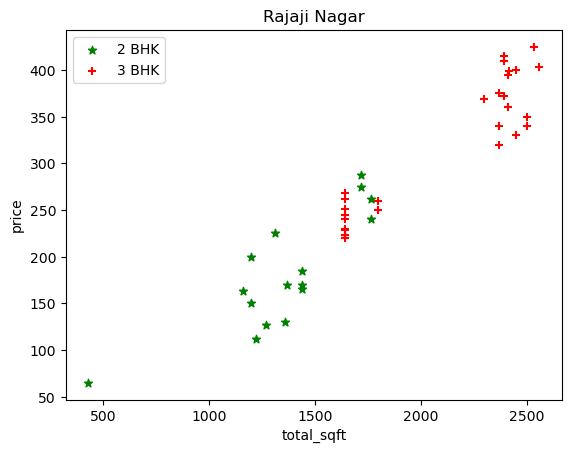

In [63]:
plot_scatter_plot(df,"Rajaji Nagar")

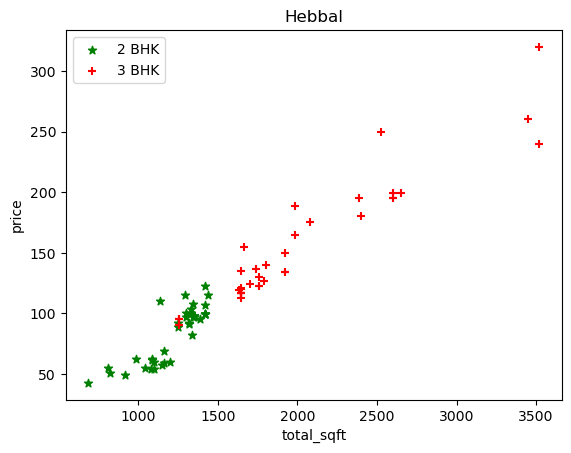

In [64]:
plot_scatter_plot(df,"Hebbal")

NOW CHECKING ABOUT THE PRICE DISTIBUTION WITH COUNT

(array([2.250e+02, 1.815e+03, 2.632e+03, 1.473e+03, 3.960e+02, 2.790e+02,
        2.040e+02, 1.700e+02, 1.270e+02, 7.400e+01, 5.500e+01, 2.400e+01,
        1.800e+01, 1.300e+01, 1.100e+01, 7.000e+00, 4.000e+00, 7.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1300.        ,  3028.33333333,  4756.66666667,  6485.        ,
         8213.33333333,  9941.66666667, 11670.        , 13398.33333333,
        15126.66666667, 16855.        , 18583.33333333, 20311.66666667,
        22040.        , 23768.33333333, 25496.66666667, 27225.        ,
        28953.33333333, 30681.66666667, 32410.        , 34138.33333333,
        35866.66666667, 37595.        , 39323.33333333, 41051.66666667,
        42780.        , 44508.33333333, 46236.66666667, 47965.        ,
        49693.33333333, 51421.66666667, 53150.        ]),
 <BarContainer object of 30 artists>)

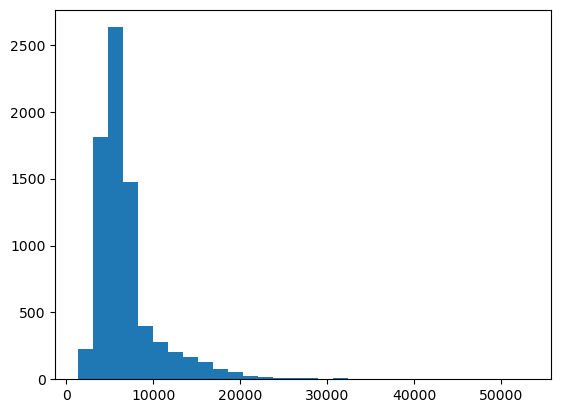

In [65]:
plt.hist(df.price_per_sqft,bins=30)

IT IS LIKE ALMOST A BELL CURVE WITH NORMAL DISTRIBUTION IT IS GOOD DATASET NOW.

EXPLORE BATHROOM FEATURE NOW

In [66]:
df.bath.unique()

array([ 4.,  3.,  6.,  2.,  1.,  5.,  8.,  7.,  9., 10., 27., 11., 15.,
       13.])

In [67]:
df[df.bath>10]

,location,bhk,total_sqft,bath,balcony,price,price_per_sqft
8440,other,27,8000.0,27.0,0.0,230.0,2875.000000
8449,other,11,1200.0,11.0,0.0,170.0,14166.666667
9096,other,14,1250.0,15.0,0.0,125.0,10000.000000
10107,other,13,5425.0,13.0,0.0,275.0,5069.124424


WE ARE GOING TO STAY OK WITH THIS. BUT WE WILL BE CONSERNED WITH THE APARTS WITH BATHROOMS ARE MORETHAN BEROOMS+2 SO WE ARE GONNA REMOVE THEM

(array([6.090e+02, 0.000e+00, 0.000e+00, 4.122e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 1.785e+03, 0.000e+00, 0.000e+00, 0.000e+00, 6.180e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 2.220e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 1.140e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.400e+01,
        0.000e+00, 0.000e+00, 2.000e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        1.200e+01, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

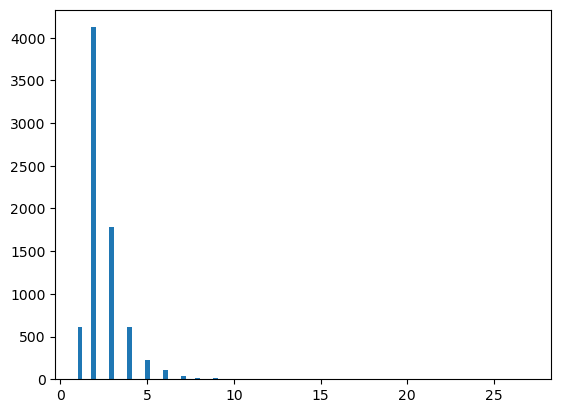

In [68]:
plt.hist(df.bath,bins=100)

In [69]:
buffer_df=df.copy()
buffer_df=buffer_df[buffer_df.bath<buffer_df.bhk+2]
buffer_df.shape

(7459, 7)

In [70]:
df=buffer_df.copy()
df

,location,bhk,total_sqft,bath,balcony,price,price_per_sqft
0,1st Block Jayanagar,4,2850.0,4.0,1.0,428.0,15017.543860
1,1st Block Jayanagar,3,1630.0,3.0,2.0,194.0,11901.840491
2,1st Block Jayanagar,6,1200.0,6.0,2.0,125.0,10416.666667
3,1st Block Jayanagar,3,1875.0,2.0,3.0,235.0,12533.333333
4,1st Block Jayanagar,7,930.0,4.0,2.0,85.0,9139.784946
...,...,...,...,...,...,...,...
10817,other,1,1800.0,1.0,1.0,200.0,11111.111111
10818,other,3,2000.0,2.0,2.0,360.0,18000.000000
10819,other,2,1140.0,1.0,1.0,185.0,16228.070175
10822,other,2,1353.0,2.0,2.0,110.0,8130.081301


MODEL BUILDING

In [71]:
df.drop(['price_per_sqft','balcony'],axis=1,inplace=True)
df

,location,bhk,total_sqft,bath,price
0,1st Block Jayanagar,4,2850.0,4.0,428.0
1,1st Block Jayanagar,3,1630.0,3.0,194.0
2,1st Block Jayanagar,6,1200.0,6.0,125.0
3,1st Block Jayanagar,3,1875.0,2.0,235.0
4,1st Block Jayanagar,7,930.0,4.0,85.0
...,...,...,...,...,...
10817,other,1,1800.0,1.0,200.0
10818,other,3,2000.0,2.0,360.0
10819,other,2,1140.0,1.0,185.0
10822,other,2,1353.0,2.0,110.0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7459 entries, 0 to 10823
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7459 non-null   object 
 1   bhk         7459 non-null   int64  
 2   total_sqft  7459 non-null   float64
 3   bath        7459 non-null   float64
 4   price       7459 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 349.6+ KB


WE SHOULD CHANGE THE LOCATION VARIABLE TO NUMERICAL FORM
WE WILL USE ONE-HOT ENCODING

In [73]:
dummies=pd.get_dummies(df.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
new_df=pd.concat([df,dummies.drop('other',axis=1)],axis='columns')
new_df.drop('location',axis=1,inplace=True)

In [75]:
new_df.head(3)

,bhk,total_sqft,bath,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4,2850.0,4.0,428.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,194.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,1200.0,6.0,125.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
y_in=new_df.price

In [77]:
x_in=new_df.drop('price',axis=1)

In [78]:
from sklearn.model_selection import train_test_split
X,x,Y,y=train_test_split(x_in,y_in,test_size=0.2)

In [79]:
from sklearn.linear_model import LinearRegression
LinReg=LinearRegression()
LinReg.fit(X,Y)
LinReg.score(x,y)

0.6573977475359556

In [80]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),x_in,y_in,cv=cv)

array([0.64816506, 0.68495204, 0.67505946, 0.65351523, 0.75595903])

In [81]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos={
        'linear_regression':{
            'model': LinearRegression(),
            'params':{
#                 'normalize':[True,False]
            }
        },
        'lasso':
        {
            'model': Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':
        {
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['squared_error','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [82]:
find_best_model_using_gridsearchcv(x_in,y_in)

,model,best_score,best_params
0,linear_regression,0.683530,{}
1,lasso,0.598604,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.471466,"{'criterion': 'squared_error', 'splitter': 'ra..."


AS LINEAR REGRESSION WORKS BEST IN THIS CASE WE CAN JUST USE THE LinReg WHICH IS CREATED FOR PREDICTION

In [83]:
LinReg

LinearRegression()

In [84]:
x_in.columns

Index(['bhk', 'total_sqft', 'bath', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=238)

In [85]:
loc_index=np.where(x_in.columns=='1st Phase JP Nagar')[0][0]
loc_index

4

In [86]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(x_in.columns==location)[0][0]
    
    x1=np.zeros(len(x_in.columns))
    x1[0]=bhk
    x1[1]=sqft
    x1[2]=bath
    if loc_index >=0:
        x[loc_index]=1
    return LinReg.predict([x1])[0]

In [87]:
predict_price('1st Phase JP Nagar',2000,2,2)

/home/kali/.local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


250.02770390131153

In [88]:
predict_price('1st Phase JP Nagar',2000,3,3)

/home/kali/.local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


242.93949437722142

MODEL IS NOT GOOD BUT OK FOR NOW


In [89]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(LinReg,f)

In [91]:
import json
columns={
    'data_columns' : [col.lower() for col in x_in.columns]
}

with open('columns.json','w') as f:
    f.write(json.dumps(columns))